# Tarea 3: Reguladores y Validación Cruzada
### Integrantes
- Axel Mondaca
- Sebastían Hernández

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from prettytable import PrettyTable

In [4]:
df = pd.read_csv('grades_Tarea3.csv')
df

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [5]:
df.drop(columns=['school', 'sex','address',
                 'famsize','Parrent_status', 'Father_job','Mother_job', 'reason_to_chose_school',
                 'guardian','extra_curr_activities','nursery',
                 'internet_access','freetime_after_school','goout_with_friends',
                 'weekend_alcohol_consum','health_status'], inplace=True) 
df


,age,Mother_edu,Father_edu,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,Interested_in_higher_edu,romantic_relationship,Family_quality_reln,workday_alcohol_consum,absences,G1,G2,G3
0,18,4,4,2,2,0,1,0,0,1,0,4,1,6,5,6,6
1,17,1,1,1,2,0,0,1,0,1,0,5,1,4,5,5,6
2,15,1,1,1,2,3,1,0,1,1,0,4,2,10,7,8,10
3,15,4,2,1,3,0,0,1,1,1,1,3,1,2,15,14,15
4,16,3,3,1,2,0,0,1,1,1,0,4,1,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,0,1,1,1,0,5,4,11,9,9,9
391,17,3,1,2,1,0,0,0,0,1,0,2,3,3,14,16,16
392,21,1,1,1,1,3,0,0,0,1,0,5,3,3,10,8,7
393,18,3,2,3,1,0,0,0,0,1,0,4,3,0,11,12,10


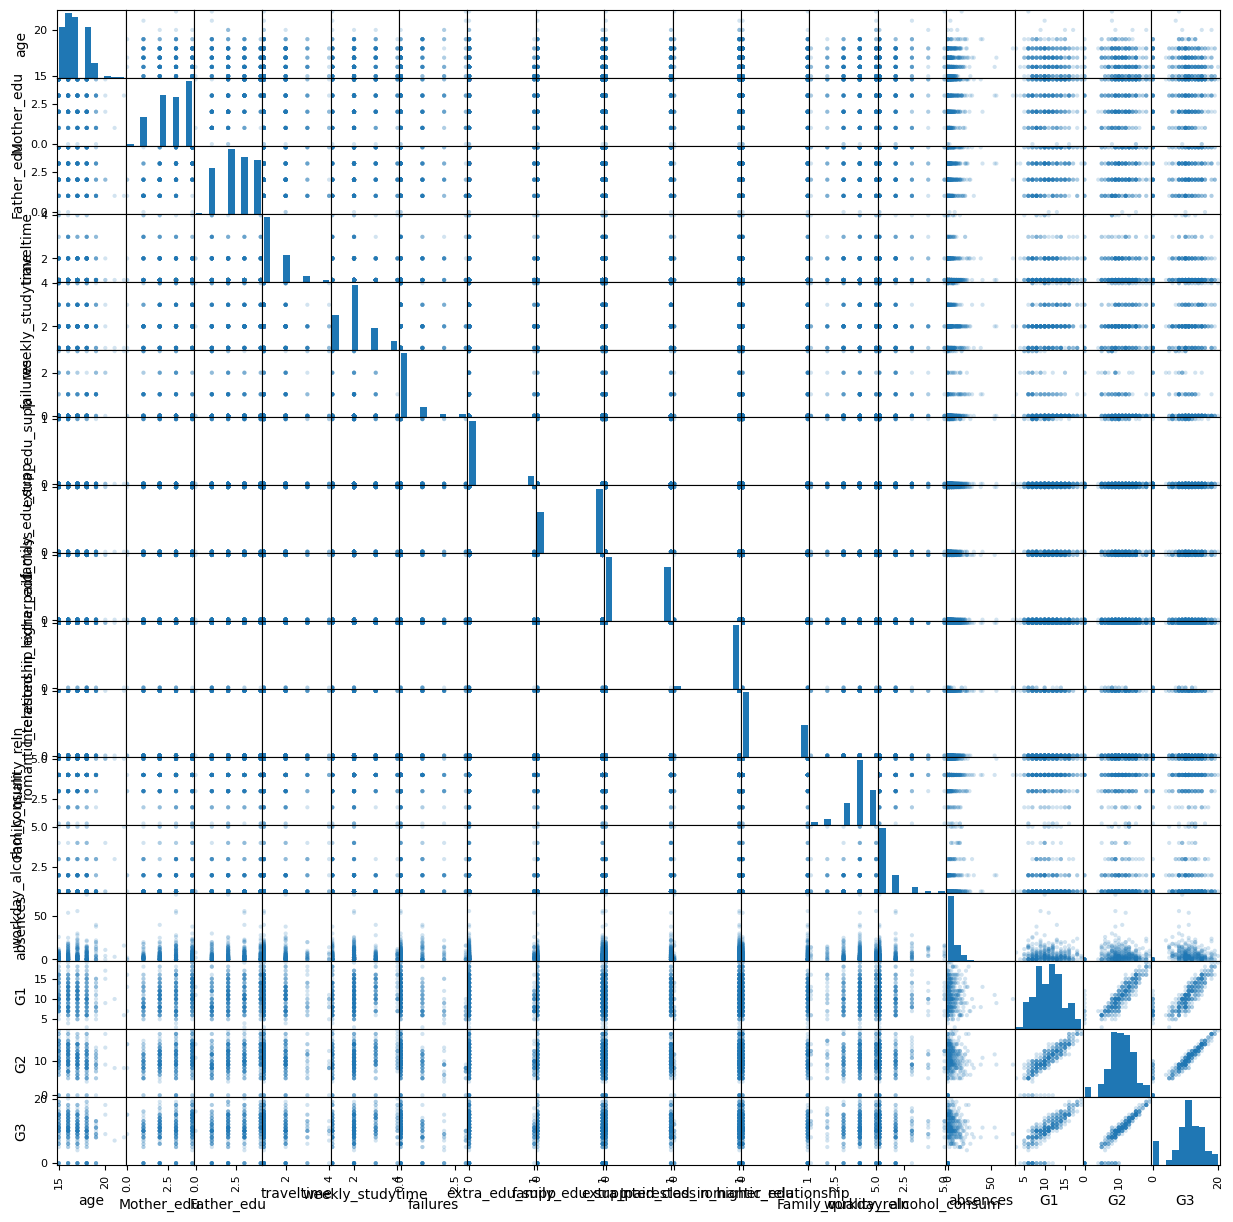

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, alpha=0.2, figsize=(15, 15)) # SPLOM
plt.show()

### Variable objetivo: G3

In [37]:
x = df.drop(columns=['G3'])
y = df['G3']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=254)

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [39]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

MSE: 4.820595170778995
R^2: 0.7580008489315339


In [40]:
L1 = Lasso(alpha=1)
L1.fit(x_train, y_train)
y_pred = L1.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')
L1_MSE = mean_squared_error(y_test, y_pred)
L1_R2 = r2_score(y_test, y_pred)

MSE: 5.041794070292544
R^2: 0.7468964221951756


In [41]:
l1_optimizer = GridSearchCV(L1, {'alpha': [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='r2') # modelo 
l1_optimizer.fit(x_train, y_train) # dobleces de la validación cruzada
l1_optimizer.best_params_

{'alpha': 0.1}

In [42]:
L1_opt = Lasso(alpha=l1_optimizer.best_params_['alpha'])
L1_opt.fit(x_train, y_train)
y_pred = L1_opt.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')
L1_opt_MSE = mean_squared_error(y_test, y_pred)
L1_opt_R2 = r2_score(y_test, y_pred)

MSE: 4.8014512250042465
R^2: 0.7589618959519666


In [43]:
L1_opt.coef_

array([-0.08973317,  0.        , -0.        ,  0.01517838, -0.        ,
       -0.01003866,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.22977456, -0.        ,  0.04796393,  0.1451005 ,
        0.97725036])

In [44]:
ec = ''
for coeficiente, predictor in zip(L1_opt.coef_, x.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_L1 = f"y_hat = {L1_opt.intercept_:.3f} +{ec}"
modelo_ajustado_L1

'y_hat = -1.306 + 0.090*age + 0.000*Mother_edu + 0.000*Father_edu + 0.015*traveltime + 0.000*weekly_studytime + 0.010*failures + 0.000*extra_edu_supp + 0.000*family_edu_supp + 0.000*extra_paid_class + 0.000*Interested_in_higher_edu + 0.000*romantic_relationship + 0.230*Family_quality_reln + 0.000*workday_alcohol_consum + 0.048*absences + 0.145*G1 + 0.977*G2 +'

In [45]:
L2 = Ridge(alpha=l1_optimizer.best_params_["alpha"])
L2.fit(x_train, y_train)
y_pred = L2.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

MSE: 4.820427785013104
R^2: 0.7580092518800934


In [46]:
l2_optimizer = GridSearchCV(L2, {'alpha': [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='r2') # modelo 
l2_optimizer.fit(x_train, y_train) # dobleces de la validación cruzada
l2_optimizer.best_params_

{'alpha': 10}

In [47]:
ec = ''
for coeficiente, predictor in zip(L2.coef_, x.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_L2 = f"y_hat = {L2.intercept_:.3f} +{ec}"
modelo_ajustado_L2

'y_hat = -1.971 + 0.087*age + 0.089*Mother_edu + 0.148*Father_edu + 0.231*traveltime + 0.154*weekly_studytime + 0.179*failures + 0.244*extra_edu_supp + 0.208*family_edu_supp + 0.121*extra_paid_class + 0.227*Interested_in_higher_edu + 0.384*romantic_relationship + 0.331*Family_quality_reln + 0.017*workday_alcohol_consum + 0.055*absences + 0.174*G1 + 0.956*G2 +'

In [49]:
table = PrettyTable()
table.field_names = ["Modelo", "MSE", "R2"]
table.add_row(["Regresión lineal", lr_mse, lr_r2])
table.add_row(["Lasso", L1_MSE, L1_R2])
table.add_row(["Lasso optimizado", L1_opt_MSE, L1_opt_R2])
table.add_row(["Ridge", ridge_mse, ridge_r2])
table

Modelo,MSE,R2
Regresión lineal,4.820595170778995,0.7580008489315339
Lasso,5.041794070292544,0.7468964221951756
Lasso optimizado,4.8014512250042465,0.7589618959519666
Ridge,4.820427785013104,0.7580092518800934
